In [508]:
import requests
import json
from bs4 import BeautifulSoup
import lxml
import pandas as pd
from highlight_text import fig_text
from mplsoccer import VerticalPitch,Pitch
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)
import seaborn as sns
from adjustText import adjust_text
from urllib.request import urlopen
import matplotlib as mpl
from PIL import Image
from mplsoccer import Pitch, add_image
plt.style.use('default')
import matplotlib.font_manager as fm
import os

In [509]:
url = "https://understat.com/match/19375"
r = requests.get(url)
soup = BeautifulSoup(r.content, 'lxml')
scripts = soup.find_all('script')
strings = scripts[2].string
ind_start = strings.index("('")+2
ind_end = strings.index("')")
json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')
json_data = json.loads(json_data)

In [510]:
for key in list(json_data['h'].keys()):
    if json_data['h'][key]['position'] == "GK" :
        HomeGK = json_data['h'][key]['player']
        HomeGKMinutes = json_data['h'][key]['time']
        print(f"{HomeGK} : {HomeGKMinutes}")

Manuel Neuer : 90


In [511]:
for key in list(json_data['a'].keys()):
    if json_data['a'][key]['position'] == "GK" :
        AwayGK = json_data['a'][key]['player']
        AwayGKMinutes = json_data['a'][key]['time']
        print(f"{AwayGK} : {AwayGKMinutes}")

Yann Sommer : 90


In [512]:
title = soup.find_all('a')
title = title[5].text
title

'Bundesliga'

In [513]:
strings = scripts[1].string
ind_start = strings.index("('")+2
ind_end = strings.index("')")
json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')
json_data = json.loads(json_data)

In [514]:
Leagues = {'Ligue 1':"Ligue 1 uber eats",
    'EPL':"Premier League",
    'Serie A':"Serie A TIM",
    'La liga':"LaLiga Santander",
    'Bundesliga':"Bundesliga"}

Leagues_logos = {'Ligue 1':r"C:\Users\Administrator\Desktop\DataVizMaterial\Leagues logos\Logo_Ligue_1_Uber_Eats_2020.svg.png",
    'EPL':r"C:\Users\Administrator\Desktop\DataVizMaterial\Leagues logos\Premier-League-PNG-Image.png",
    'Serie A':r"C:\Users\Administrator\Desktop\DataVizMaterial\Leagues logos\se1113l151-serie-a-logo-lega-serie-a-european-leagues.png",
    'La liga':r"C:\Users\Administrator\Desktop\DataVizMaterial\Leagues logos\6893566_preview.png",
    'Bundesliga':r"C:\Users\Administrator\Desktop\DataVizMaterial\Leagues logos\bundesliga-home-events.png"}

if title in Leagues_logos.keys():
        league = Leagues[title]
        league_logo = Leagues_logos[title]
        print(league,": ",league_logo)

Bundesliga :  C:\Users\Administrator\Desktop\DataVizMaterial\Leagues logos\bundesliga-home-events.png


In [515]:
date = pd.to_datetime(json_data['h'][0]['date'])

date = f"{date.day} {date.month_name()} {date.year}"

date

'27 August 2022'

In [516]:
h_minutes = [json_data['h'][i]['minute'] for i in range(len(json_data['h']))]
h_X = [json_data['h'][i]['X'] for i in range(len(json_data['h']))]
h_Y = [json_data['h'][i]['Y'] for i in range(len(json_data['h']))]
h_xG = [json_data['h'][i]['xG'] for i in range(len(json_data['h']))]
h_player_name = [json_data['h'][i]['player'] for i in range(len(json_data['h']))]
h_assisted_by = [json_data['h'][i]['player_assisted'] for i in range(len(json_data['h']))]
h_player_id = [json_data['h'][i]['player_id'] for i in range(len(json_data['h']))]
h_player_team = [json_data['h'][i]['h_team'] for i in range(len(json_data['h']))]
h_situation = [json_data['h'][i]['situation'] for i in range(len(json_data['h']))]
h_result = [json_data['h'][i]['result'] for i in range(len(json_data['h']))]
h_last_action = [json_data['h'][i]['lastAction'] for i in range(len(json_data['h']))]


df_home = pd.DataFrame({'Minute':h_minutes,'X':h_X,'Y':h_Y,'xG':h_xG,'Player':h_player_name,'player_id':h_player_id,
                        'Assist':h_assisted_by,'Home Team':h_player_team,'Situation':h_situation,"Last action":h_last_action,'Output':h_result})

df_home['Minute'] = df_home['Minute'].astype(int)
df_home['X'] = df_home['X'].astype(float).round(2)
df_home['Y'] = df_home['Y'].astype(float).round(2)
df_home['xG'] = df_home['xG'].astype(float).round(2)
df_home['Minute'] = df_home['Minute'].astype(int)

df_home.Output.replace(['MissedShots','SavedShot', 'BlockedShot','ShotOnPost'],
                      ['Missed Shot','Saved Shot', 'Blocked Shot', 'Shot On Post'],inplace=True)
df_home['Situation'].replace(['OpenPlay','DirectFreekick','FromCorner','SetPiece'],
                            ['Open Play','Direct Free kick','From Corner','Set Piece'] ,inplace=True)

df_home['Last action'].replace(['BallRecovery', 'TakeOn','Throughball','LayOff', 'HeadPass','BallTouch','BlockedPass'],
                               ['Ball Recovery', 'Take On','Through ball','Lay Off', 'Head Pass','Ball Touch','Blocked Pass'],inplace=True)

for i in range(len(df_home)):
    df_home['X'][i] = df_home['X'][i]*120 - 0.3
    df_home['Y'][i] = abs(df_home['Y'][i]*80 - 80)

home_team = df_home['Home Team'].unique()[0]
home_score = df_home[df_home['Output'] == 'Goal'].shape[0]
home_score_xg = df_home['xG'].sum()
home_score_xg = round(home_score_xg,2)

In [517]:
a_minutes = [json_data['a'][i]['minute'] for i in range(len(json_data['a']))]
a_X = [json_data['a'][i]['X'] for i in range(len(json_data['a']))]
a_Y = [json_data['a'][i]['Y'] for i in range(len(json_data['a']))]
a_xG = [json_data['a'][i]['xG'] for i in range(len(json_data['a']))]
a_player_name = [json_data['a'][i]['player'] for i in range(len(json_data['a']))]
a_assisted_by = [json_data['a'][i]['player_assisted'] for i in range(len(json_data['a']))]
a_player_id = [json_data['a'][i]['player_id'] for i in range(len(json_data['a']))]
a_player_team = [json_data['a'][i]['a_team'] for i in range(len(json_data['a']))]
a_situation = [json_data['a'][i]['situation'] for i in range(len(json_data['a']))]
a_result = [json_data['a'][i]['result'] for i in range(len(json_data['a']))]
a_last_action = [json_data['a'][i]['lastAction'] for i in range(len(json_data['a']))]

df_away = pd.DataFrame({'Minute':a_minutes,'X':a_X,'Y':a_Y,'xG':a_xG,'Player':a_player_name,'Assist':a_assisted_by,'player_id':a_player_id,'Away Team':a_player_team,'Situation':a_situation,'Last action':a_last_action,'Output':a_result})

df_away['Minute'] = df_away['Minute'].astype(int)
df_away['X'] = df_away['X'].astype(float).round(2)
df_away['Y'] = df_away['Y'].astype(float).round(2)
df_away['xG'] = df_away['xG'].astype(float).round(2)
df_away['Minute'] = df_away['Minute'].astype(int)

for i in range(len(df_away)):
    df_away['X'][i] = df_away['X'][i]*120 - 0.3
    df_away['Y'][i] = abs(df_away['Y'][i]*80-80)


df_away.Output.replace(['MissedShots','SavedShot', 'BlockedShot','ShotOnPost','OwnGoal'],
                      ['Missed Shot','Saved Shot', 'Blocked Shot', 'Shot On Post',"Own Goal"],inplace=True)
df_away['Situation'].replace(['OpenPlay','DirectFreekick','FromCorner','SetPiece'], 
                            ['Open Play','Direct Free kick','From Corner','Set Piece'] ,inplace=True)

df_away['Last action'].replace(['BallRecovery', 'TakeOn','Throughball','LayOff', 'HeadPass','BallTouch','BlockedPass'],
                               ['Ball Recovery', 'Take On','Through ball','Lay Off', 'Head Pass','Ball Touch','Blocked Pass'],inplace=True)

"""""df['Shot type'].replace(['LeftFoot', 'RightFoot','OtherBodyPart'],
                            ['Left Foot','Right Foot' ,'Other Body Part'] ,inplace=True)"""""


away_team = df_away['Away Team'].unique()[0]
away_score = df_away[df_away['Output'] == 'Goal'].shape[0]
away_score_xg = df_away['xG'].sum()
away_score_xg = round(away_score_xg,2)

In [518]:
GoalKeeperName = input(f"Enter the goalkeeper name from {HomeGK} or {AwayGK} :")

GoalKeeperName = GoalKeeperName.title().strip()

if  GoalKeeperName == HomeGK:
    ShotsDf = df_away
    Team = away_team
    h_a = "H"
    LogoTeam = home_team
    Minutes = HomeGKMinutes

else:
    ShotsDf = df_home
    Team = home_team
    h_a = "A"
    LogoTeam = away_team
    Minutes = AwayGKMinutes
    

In [519]:
Shots = len(ShotsDf)
SavedShots = len(ShotsDf[ShotsDf.Output=='Saved Shot'])
Goals = len(ShotsDf[ShotsDf.Output=='Goal'])
ShotsOnTarget = len(ShotsDf[(ShotsDf.Output !='Blocked Shot') & (ShotsDf.Output != 'Missed Shot') & (ShotsDf.Output != 'Own Goal')])

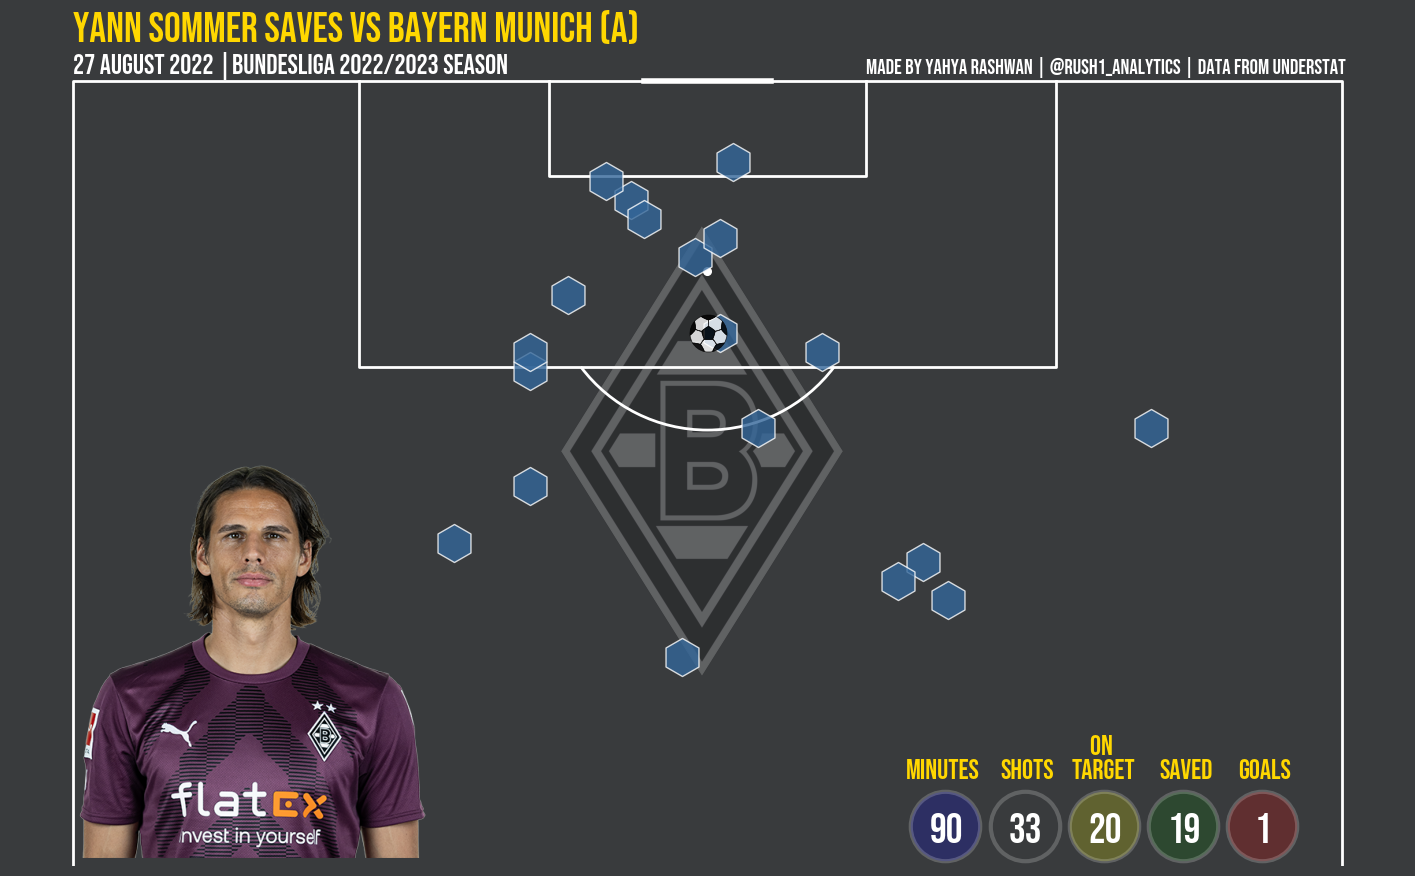

In [520]:
background = '#393b3d'
text_color = 'white'

mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['axes.labelcolor']='black'
mpl.rcParams['text.color']=text_color
mpl.rcParams['legend.fontsize'] = 15


path = r"D:\Downloads\Downloads\1d8761b0-9410-11e9-ba67-ebab80fd2244.otf"
fontprop = fm.FontProperties(fname=path, size=30, weight='bold', style='normal', stretch='normal')
fontprop2 = fm.FontProperties(fname=path, size=10*2, weight='bold', style='normal', stretch='normal')
fontprop3 = fm.FontProperties(fname=path, size=5*3, weight='bold', style='normal', stretch='normal')

pitch = VerticalPitch( half=True,goal_type='line',line_color='white',pad_bottom=-10.5,linewidth=2)
fig, ax = plt.subplots(figsize=(6*3,4*3))
ax.axis('off')

fig.patch.set_color(background)
pitch.draw(ax=ax)

for i in range(len(ShotsDf)):
    if ShotsDf.Output[i] == "Saved Shot":
        pitch.scatter(ax=ax,x=ShotsDf['X'][i],y=ShotsDf['Y'][i],c="#336699",s=750,alpha=0.8,marker='h',edgecolors='white')
    elif ShotsDf.Output[i] == "Goal":
        pitch.scatter(ax=ax,x=ShotsDf['X'][i],y=ShotsDf['Y'][i],c="white",s=750,alpha=0.8,marker='football',edgecolors='black')

pitch.scatter(ax=ax,x=73,y=60,c="#393b3d",s=2500,alpha=0.2,marker='o',edgecolors='white', linewidth=3)
pitch.scatter(ax=ax,x=73,y=65,c="yellow",s=2500,alpha=0.2,marker='o',edgecolors='white', linewidth=3)
pitch.scatter(ax=ax,x=73,y=70,c="green",s=2500,alpha=0.2,marker='o',edgecolors='white', linewidth=3)
pitch.scatter(ax=ax,x=73,y=75,c="red",s=2500,alpha=0.2,marker='o',edgecolors='white', linewidth=3)
pitch.scatter(ax=ax,x=73,y=55,c="blue",s=2500,alpha=0.2,marker='o',edgecolors='white', linewidth=3)
#############################################################################################
if Shots < 10 or SavedShots < 10 or ShotsOnTarget < 10:
        ax.text(74.5, 72, f"{Goals}" ,  fontproperties=fontprop,c='white')
        ax.text(74.5-5, 72,f"{SavedShots}" , fontproperties=fontprop,c='white')
        ax.text(74.5-10, 72,f"{ShotsOnTarget}" , fontproperties=fontprop,c='white')
        ax.text(74.5-15.5, 72,f"{Shots}" , fontproperties=fontprop,c = 'white')
        ax.text(74.5-20.5, 72,f"{Minutes}" , fontproperties=fontprop,c = 'white')
else:
        ax.text(74.5, 72, f"{Goals}" ,  fontproperties=fontprop,c='white')
        ax.text(74.5-5.5, 72,f"{SavedShots}" , fontproperties=fontprop,c='white')
        ax.text(74.5-10.5, 72,f"{ShotsOnTarget}" , fontproperties=fontprop,c='white')
        ax.text(74.5-15.5, 72,f"{Shots}" , fontproperties=fontprop,c = 'white')
        ax.text(74.5-20.5, 72,f"{Minutes}" , fontproperties=fontprop,c = 'white')

ax.text(73.5, 76,"Goals" ,c='#FFD700', fontproperties=fontprop2)
ax.text(73.5-5, 76,"Saved" ,c='#FFD700', fontproperties=fontprop2)
ax.text(73.5-10.5, 76,"    On\nTarget" ,c='#FFD700', fontproperties=fontprop2)
ax.text(73.5-15, 76,"Shots" ,c='#FFD700', fontproperties=fontprop2)
ax.text(73.5-21, 76,"Minutes" ,c='#FFD700', fontproperties=fontprop2)

##############################################################################################
ax.text(0.0045, 122.5,f"{GoalKeeperName} saves vs {Team} ({h_a}) " ,c='#FFD700', fontproperties=fontprop)
ax.text(0.0047, 120.5, f'{date} |{league} 2022/2023 season', fontproperties= fontprop2)

ax.text(50, 120.5, 'Made by Yahya Rashwan | @Rush1_Analytics | Data from understat', fontproperties= fontprop3)

try:
        PlotGK = fig.add_axes((0.15, 0.125,0.175*1.25,0.3*1.25))
        PlotGK.patch.set_facecolor(background)
        PlotGK.axis('off')
        im = plt.imread(rf"C:\Users\Administrator\Desktop\DataVizMaterial\Players\{GoalKeeperName}.png")
        PlotGK.imshow(im)
        PlotTeamLogo = fig.add_axes((0.40, 0.3,0.175*1.25,0.3*1.25))
except:
        pass


PlotTeamLogo.patch.set_facecolor(background)
PlotTeamLogo.axis('off')
im = plt.imread(rf"C:\Users\Administrator\Desktop\DataVizMaterial\club badges\{LogoTeam}.png")
PlotTeamLogo.imshow(im,alpha=0.2)

PlotTeamLogo.set_zorder(-1)
ax.set_zorder(1)

fig.savefig(rf"C:\Users\Administrator\Desktop\DataVizMaterial\Goal Keepers\{GoalKeeperName} vs {Team}.png",dpi=300,bbox_inches='tight',transparent=True,facecolor="#393b3d")
